In [1]:
from lossy_modes import Array
import numpy as np
import matplotlib.pyplot as plt

In [110]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
rjs = 0 #Fixed for Q factor linked to this loss at 10**6
rjp = np.inf #Fixed for Q factor linked to this loss at 10**6
cg = 0.04e-6
rg = np.inf #Fixed for Q factor linked to this loss at 10**6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
var_rjs,var_rjp,var_rg = 7.18364016e-5,7.03064222e7,2.85527807e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions in bare mode
#var_rjs,var_rjp,var_rg = 7.183e-5,7.03e7,2.85528e9

res_compute = Array(n_jct,[lj,cj,var_rjs,rjp,cg,rg,ct])
res_compute.resonator_correction()
q0_var_rjs = res_compute.get_bare_q()

res_compute = Array(n_jct,[lj,cj,rjs,var_rjp,cg,rg,ct])
res_compute.resonator_correction()
q0_var_rjp = res_compute.get_bare_q()

res_compute = Array(n_jct,[lj,cj,rjs,rjp,cg,var_rg,ct])
res_compute.resonator_correction()
q0_var_rg = res_compute.get_bare_q()

Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify


Q_rjs : 0.0005489180330187082 | Q_rjp : 0.00016118190251290798 | Q_rg : 0.00027532142121344805


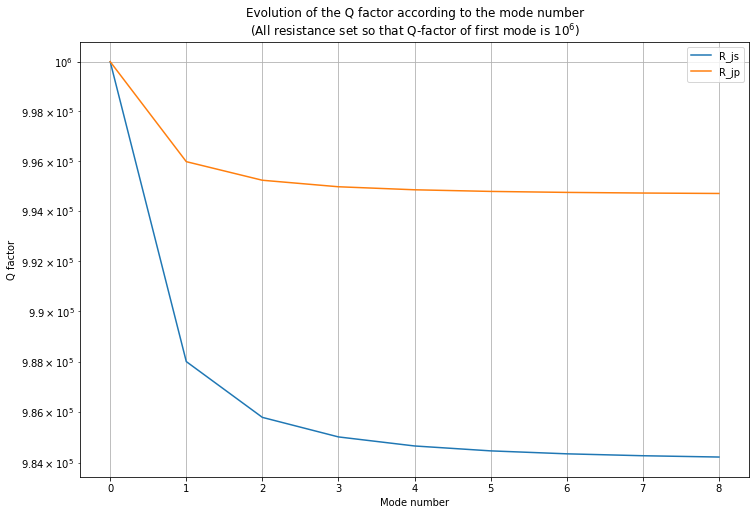

In [114]:
print(f"Q_rjs : {q0_var_rjs[0]-1e6} | Q_rjp : {q0_var_rjp[0]-1e6} | Q_rg : {q0_var_rg[0]-1e6}")
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(q0_var_rjs[:n_plot],label="R_js")
ax.plot(q0_var_rjp[:n_plot],label="R_jp")
#ax.plot(q0_var_rg[:n_plot],label="R_g")
ax.legend()
ax.set_xlabel("Mode number")
ax.set_ylabel("Q factor")
ax.set_title("Evolution of the Q factor according to the mode number\n"+r"(All resistance set so that Q-factor of first mode is $10^6$)")
ax.set_yscale("log")
ax.grid()
fig.savefig("Q_factor_evolution_mode_no_r_g.jpg")

IndexError: invalid index to scalar variable.

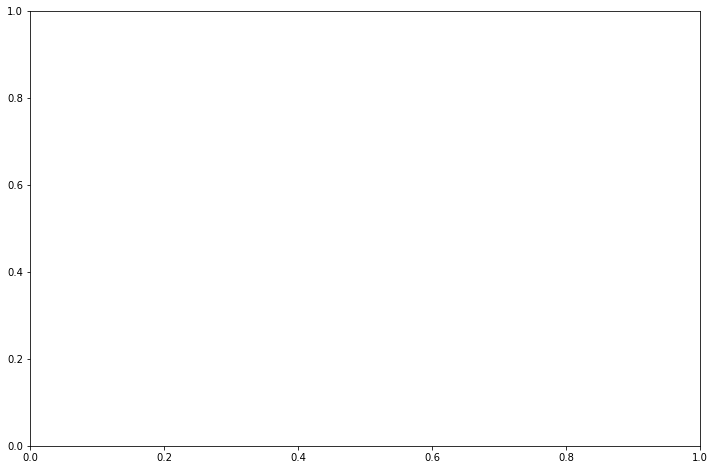

In [99]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(n_var, [el[0] for el in q0_var_rjs], label="R_js")
ax.plot(n_var, [el[0] for el in q0_var_rjp],label="R_jp")
ax.plot(n_var, [el[0] for el in q0_var_rg],label="R_g")
ax.legend()
ax.set_xlabel("Number of junctions")
ax.set_ylabel("Q factor")
ax.set_title("Evolution of the Q factor according to the number of junctions")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()
fig.savefig("Q_factor_evolution_number_jct_R_j_in_resonator_log_log.jpg")

In [115]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
rjs = 0 #Fixed for Q factor linked to this loss at 10**6
rjp = np.inf #Fixed for Q factor linked to this loss at 10**6
cg = 0.04e-6
rg = np.inf #Fixed for Q factor linked to this loss at 10**6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
#var_rjs,var_rjp,var_rg = 7.18e-5,7.032e7,2.856e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions
var_rjs,var_rjp,var_rg = 5.556779487e-3,2.559081194e7,2.85528e9

lc_cst = 15*6.5e-5
l_j_lst = np.linspace(1,100,500)
c_t_list = [lc_cst/l for l in l_j_lst]
l_j_utils = [el/n_jct for el in l_j_lst]
c_j_list = [1/(l*(15*2*np.pi)**2) for l in l_j_utils]
for lj,ct,cj in zip(l_j_utils,c_t_list,c_j_list):
    res_compute = Array(n_jct,[lj,cj,var_rjs,rjp,cg,rg,ct])
    res_compute.resonator_correction(n_corr=1)
    q0_var_rjs.append(res_compute.get_resonator_q())

    res_compute = Array(n_jct,[lj,cj,rjs,var_rjp,cg,rg,ct])
    res_compute.resonator_correction(n_corr=1)
    q0_var_rjp.append(res_compute.get_resonator_q())

    res_compute = Array(n_jct,[lj,cj,rjs,rjp,cg,var_rg,ct])
    res_compute.resonator_correction(n_corr=1)
    q0_var_rg.append(res_compute.get_resonator_q())

Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to

In [116]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(l_j_utils, [el[0] for el in q0_var_rjs], label=r"$Q_{js}$ et $Q_g$")
ax.plot(l_j_utils, [el[0] for el in q0_var_rjp],label=r"$Q_{jp}$")
#ax.plot(l_j_utils, [el[0] for el in q0_var_rg],label=r"$Q_g$")
ax.plot(l_j_utils, [1/(1/el1[0]+ 1/el2[0] + 1/el3[0]) for el1,el2,el3 in zip(q0_var_rjs,q0_var_rg,q0_var_rjp)],label=r"$Q_{tot}$")
ax.legend()
ax.set_xlabel("Junctions inductance")
ax.set_ylabel("Q factor")
ax.set_title("Evolution of the Q factor according to junction inductance.\n(The plasma frequency of the junctions and the fundamental mode of the resonator are kept constant.)")
ax.set_yscale("log")
3fig.savefig("graphs/Q_factor_evolution_junction_impedance_20jct.jpg")

SyntaxError: invalid syntax (2758593231.py, line 11)

In [102]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
rjs = 0 #Fixed for Q factor linked to this loss at 10**6
rjp = np.inf #Fixed for Q factor linked to this loss at 10**6
cg = 0.04e-6
rg = np.inf #Fixed for Q factor linked to this loss at 10**6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
var_rjs,var_rjp,var_rg = 7.18e-5,7.032e7,2.856e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions
#var_rjs,var_rjp,var_rg = 5.556779487e-3,2.559081194e7,2.85528e9
n_var = np.logspace(0,2,50)
n_var= list(set([int(val) for val in n_var if int(val)>4]))
print(n_var)
for n_jct in n_var:
    res_compute = Array(n_jct,[lj,cj,var_rjs,rjp,cg,rg,ct])
    res_compute.resonator_correction()
    q0_var_rjs.append(res_compute.get_bare_q())

    res_compute = Array(n_jct,[lj,cj,rjs,var_rjp,cg,rg,ct])
    res_compute.resonator_correction()
    q0_var_rjp.append(res_compute.get_bare_q())

    res_compute = Array(n_jct,[lj,cj,rjs,rjp,cg,var_rg,ct])
    res_compute.resonator_correction()
    q0_var_rg.append(res_compute.get_bare_q())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 20, 22, 24, 26, 29, 32, 35, 39, 42, 47, 51, 56, 62, 68, 75, 82, 91, 100]
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculati

C:\Users\rroussea\Desktop\Work\JJarray_formal\eom_model\lossy_modes.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return [(m / self._lj + wk ** 2 * (self._cg / 2 + self._cj * m)) / (2 * wk * (


Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify
Resonators Q are under evaluated, calculation to modify


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Resonators Q are under evaluated, calculation to modify


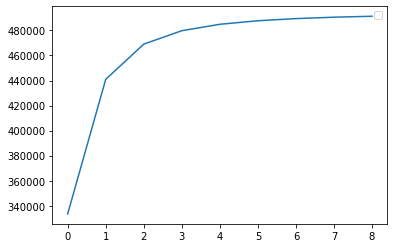

In [107]:
n_jct = 20
n_plot = 10
lj = 15/n_jct
cj = 1/(lj*(15*2*np.pi)**2)
cg = 0.04e-6
ct = 6.5e-5

q0_var_rjs, q0_var_rjp, q0_var_rg = [], [], []
var_rjs,var_rjp,var_rg = 7.18e-5,7.032e7,2.856e9 #Fixed for Q factor linked to this loss at 10**6, and 20 junctions
#var_rjs,var_rjp,var_rg = 5.556779487e-3,2.559081194e7,1.03929175e9

array_cpt = Array(n_jct,[lj,cj,var_rjs,var_rjp,cg,var_rg,ct])
array_cpt.resonator_correction()
q_res_cl = array_cpt.get_bare_q()
plt.plot(q_res_cl)
plt.legend()
plt.show()

In [108]:
def rlc_vals(f,q,l):
    c = 1/(l*(f*2*np.pi)**2)
    r = q/(2*np.pi*f*c)
    return r,l,c

z_eq = lambda w, _r, _l, _c : _r + 1j*_l*w + 1/(1j*_c*w)
s_11 = lambda w, _r, _l, _c, _z0 : (z_eq(w,_r,_l,_c)-_z0) / (z_eq(w,_r,_l,_c)+_z0)

(0.9999999992042252-2.019785524229506e-13j)


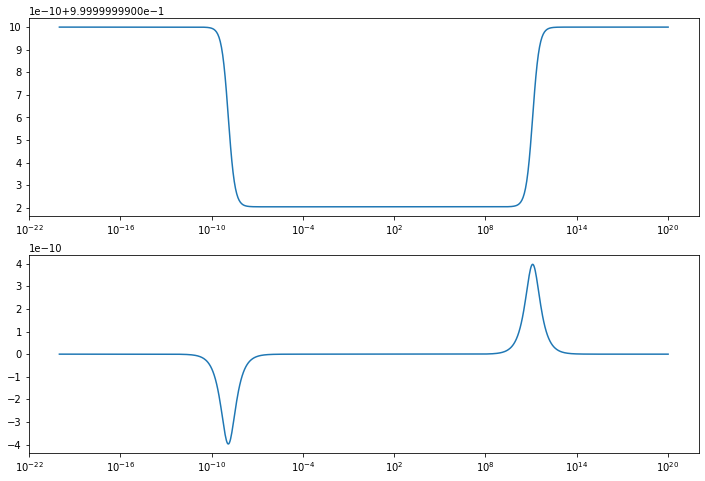

In [109]:
f_rlc = [2]
q_rlc = [1e10]
l = 1
z0 = 50

ws = np.logspace(-20,20,1000)
y_p = 0
for f,q in zip(f_rlc,q_rlc):
    r,l,c = rlc_vals(f,q,l)
    y_p += s_11(ws,r,l,c,z0)
print(np.min(y_p))
fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(ws, np.real(y_p))
axs[0].set_xscale("log")
axs[1].plot(ws, np.imag(y_p))
axs[1].set_xscale("log")